SNR=5dB


  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Nolan\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
100%|██████████| 5/5 [00:33<00:00,  6.74s/it]


SNR=6dB


100%|██████████| 5/5 [00:33<00:00,  6.77s/it]


SNR=7dB


100%|██████████| 5/5 [00:32<00:00,  6.55s/it]


SNR=8dB


100%|██████████| 5/5 [00:32<00:00,  6.47s/it]


SNR=9dB


100%|██████████| 5/5 [00:29<00:00,  5.90s/it]


SNR=10dB


100%|██████████| 5/5 [00:29<00:00,  5.84s/it]


SNR=11dB


100%|██████████| 5/5 [00:35<00:00,  7.10s/it]


SNR=12dB


100%|██████████| 5/5 [00:36<00:00,  7.38s/it]


SNR=13dB


100%|██████████| 5/5 [00:33<00:00,  6.67s/it]


SNR=14dB


100%|██████████| 5/5 [00:30<00:00,  6.07s/it]

[ -0.50115252  -1.3953869  -11.71423293 -13.59631303 -15.74207851
 -17.70770015 -19.58641439 -21.61049286 -23.58793266 -25.47605687]


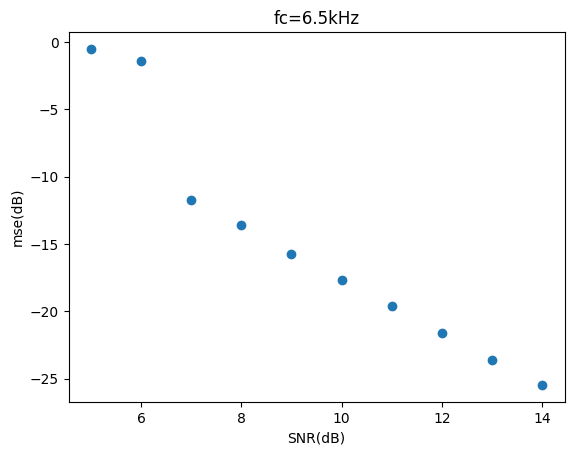

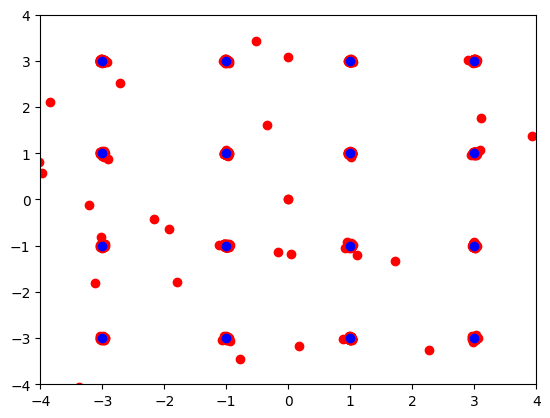

In [2]:
from bf_multichannel_const import bf_multichannel_const
import numpy as np
import matplotlib.pyplot as plt

# fc = 6.5kHz
My_bf = bf_multichannel_const(6.5e3, 2, 5,1)
# rx at (0,0)
# tx_1 at (5,5) with a wall at x=10
# after relection, tx_2 at (15,5)
My_bf.reflection_list = np.array([1,0.5])
My_bf.x_tx_list = np.array([5,15])
My_bf.y_tx_list = np.array([5,5])

My_bf.simulation()

# plt mean square error
print(My_bf.mean_mse)
plt.figure()
plt.plot(My_bf.snr_list, My_bf.mean_mse, 'o')
plt.xlabel('SNR(dB)')
plt.ylabel('mse(dB)')
plt.title(f'fc={My_bf.fc/1000:.1f}kHz')
plt.show()

symbolset = My_bf.mean_symbols[-1,:]
true_sym = np.reshape(np.tile(np.arange(-3,4,2),4),(4,4)) + 1j*np.reshape(np.repeat(np.arange(3,-4,-2),4),(4,4))

fig,ax = plt.subplots()
ax.scatter(np.real(symbolset), np.imag(symbolset), c='r')
ax.scatter(np.real(true_sym), np.imag(true_sym), c='b')
ax.set_ylim(-4, 4)
ax.set_xlim(-4,4)
ax.set_title("Constellation Diagram for SNR=15dB")
plt.show()